# Normalize red channel to match blue channel intensities

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image into RGB format
image_path = '../data/images/ClumpyLate_AS_C_I_22_2_20240724.jpg'
# image_path = '../images/ClumpyLate_AS_C_I_22_2_20240724.jpg'
# image_path = '../images/GoodEarlySilica_AS_A_I_15_6_20240717.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Split the image into color channels
red_channel = image_rgb[:, :, 0]
green_channel = image_rgb[:, :, 1]
blue_channel = image_rgb[:, :, 2]



Text(0, 0.5, 'Pixel Count')

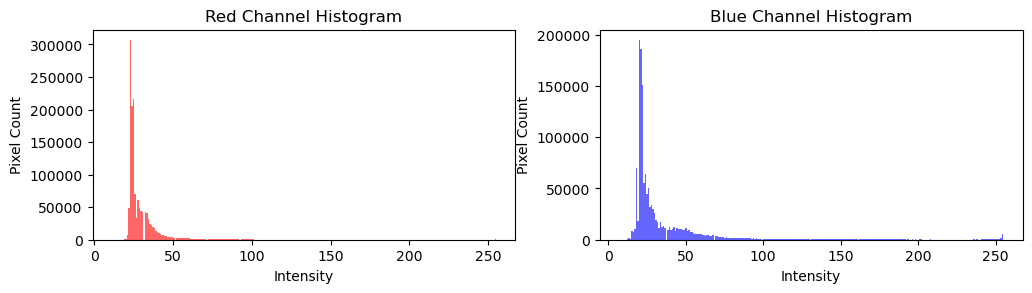

In [31]:
# Step 3: Plot histograms for red and blue channel intensity values
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.6, label='Red Channel')
plt.title('Red Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Pixel Count')

plt.subplot(2, 2, 2)
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.6, label='Blue Channel')
plt.title('Blue Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Pixel Count')


Blue mean is  36.45304533362891
Red mean is  29.93056625471071
Normalized red mean is  40.391367629128794


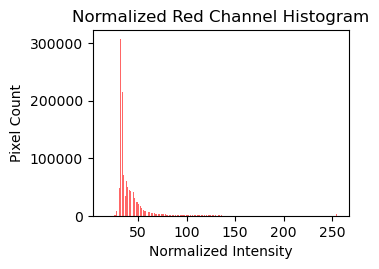

In [40]:
# Step 4: Normalize the red channel based on the blue channel
    # Normalize red channel by dividing by the mean intensity of the blue channel, avoiding division by zero
blue_mean = np.mean(blue_channel[blue_channel > 0])  # Ignore zero pixels in blue
red_mean = np.mean(red_channel[red_channel > 0])  # Ignore zero pixels in red
print("Blue mean is ", blue_mean)
print("Red mean is ", red_mean)
# THE VALUE MULTIPLIED HERE IS IMPORTANT--the idea is to match the blue mean..?
# normalized_red = (red_channel.astype(np.float32) / blue_mean) * 50 # rayna's suggestion # 127 # half of 255, orgiginal value
normalized_red = (red_channel.astype(np.float32) / blue_mean) * 50 # had tried blue_mean
normalized_red = np.clip(normalized_red, 0, 255).astype(np.uint8)  # Clip values to [0, 255]
normalized_red_mean = np.mean(normalized_red[normalized_red > 0])  # Ignore zero pixels in red
print("Normalized red mean is ", normalized_red_mean)

    # Plot normalized histograms
plt.subplot(2, 2, 3)
plt.hist(normalized_red.ravel(), bins=256, color='red', alpha=0.6, label='Normalized Red Channel')
plt.title('Normalized Red Channel Histogram')
plt.xlabel('Normalized Intensity')
plt.ylabel('Pixel Count')

plt.tight_layout()
plt.show()

Normalized blue mean is  36.445091858789624


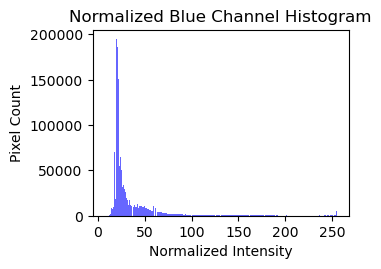

In [53]:
# Step 4: Normalize the Blue channel based on the red channel
    # Normalize red channel by dividing by the mean intensity of the blue channel, avoiding division by zero
# THE VALUE MULTIPLIED HERE IS IMPORTANT--the idea is to match the blue mean..?
# normalized_red = (red_channel.astype(np.float32) / blue_mean) * 50 # rayna's suggestion # 127 # half of 255, orgiginal value
normalized_blue = (blue_channel.astype(np.float32) / red_mean) * red_mean # had tried blue_mean
    # z-score method
blue_stdev = np.std(blue_channel.ravel())
# normalized_blue = (blue_channel.astype(np.float32) - red_mean) / blue_stdev
normalized_blue = np.clip(normalized_blue, 0, 255).astype(np.uint8)  # Clip values to [0, 255]
normalized_blue_mean = np.mean(normalized_blue[normalized_blue > 0])  # Ignore zero pixels in red
print("Normalized blue mean is ", normalized_blue_mean)

    # Plot normalized histograms
plt.subplot(2, 2, 3)
plt.hist(normalized_blue.ravel(), bins=256, color='blue', alpha=0.6, label='Normalized Blue Channel')
plt.title('Normalized Blue Channel Histogram')
plt.xlabel('Normalized Intensity')
plt.ylabel('Pixel Count')

plt.tight_layout()
plt.show()

[-0.27447063 -0.27447063 -0.27447063 ... -0.53578702 -0.53578702
 -0.53578702]
[-0.26223072 -0.26223072 -0.26223072 ... -0.462378   -0.462378
 -0.462378  ]
[-0.28816625 -0.28816625 -0.28816625 ... -0.50196451 -0.50196451
 -0.50196451]


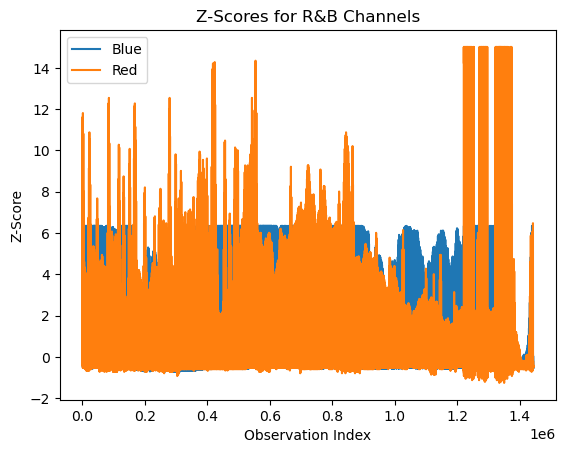

In [34]:
# Mean normalize data
import scipy.stats as stats

    # calculate z-scores
bdata=blue_channel.ravel()
blue_z_scores = stats.zscore(bdata)
print(blue_z_scores)
rdata=red_channel.ravel()
red_z_scores = stats.zscore(rdata)
print(red_z_scores)
nrdata=normalized_red.ravel()
norm_red_z_scores = stats.zscore(nrdata)
print(norm_red_z_scores)

    # plot z-scores
    # figure and axis object
fig, ax = plt.subplots()

    # plot Z-scores for each dataset
ax.plot(blue_z_scores, label='Blue')
ax.plot(red_z_scores, label='Red') # I bet these values are so skewed bc the background has amped up red
# ax.plot(norm_red_z_scores, label='Normalized Red') # same a red..?

    # customize plot
ax.set_xlabel('Observation Index')
ax.set_ylabel('Z-Score')
ax.set_title('Z-Scores for R&B Channels')
ax.legend()
plt.show()


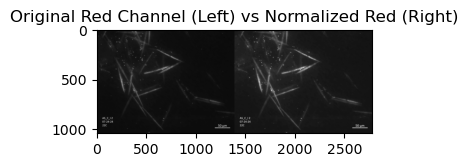

In [35]:
# Display original and normalized images side-by-side
plt.subplot(2, 2, 4)
plt.imshow(np.hstack((red_channel, normalized_red)), cmap='gray')
plt.title('Original Red Channel (Left) vs Normalized Red (Right)')

plt.tight_layout()
plt.show()

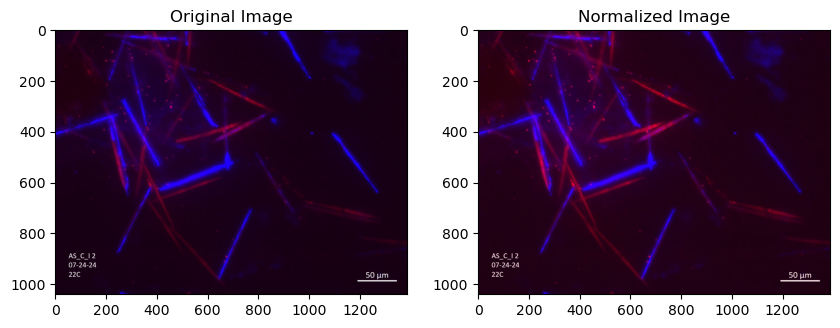

In [36]:
# Step 6: Display the original RGB image and normalized image side by side
plt.figure(figsize=(10, 5))

# Recreate normalized image by replacing red channel with the normalized red values
normalized_image = image_rgb.copy()
normalized_image[:, :, 0] = normalized_red

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image)
plt.title('Normalized Image')

plt.show()

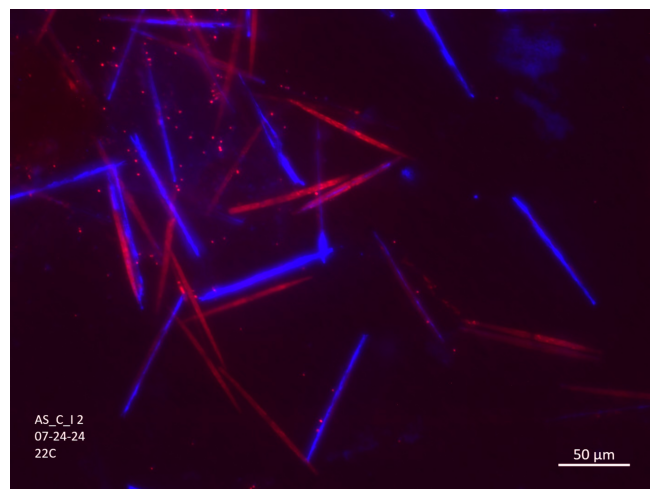

In [18]:
# save image to use in other scripts

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(normalized_image)
# plt.title('Original Image')
# ax = fig.add_axes([1,1,1,1])
# plt.plot([1,2])

# plt.savefig('../images/RedNormalizedImages/REDClumpyLate_AS_C_I_22_2_20240724.jpg', bbox_inches='tight')